In [1]:
from modules import (SVDCompressedLinear, TTCompressedLinear,
                                       factorize, make_contraction)

Working dir: /notebook/ColBERT/exps/ttm_v2


In [2]:
import torch
weights = torch.rand(768, 3072)

## Create layer

In [14]:
import sys
sys.path.append("/notebook/ColBERT")

from colbert.modeling.colbert import ColBERT

from colbert.utils.tensor_net import TTLayer

query_maxlen = 512
query_maxlen = 512
doc_maxlen = 512
dim = 128
similarity = 'cosine'

colbert = ColBERT.from_pretrained('bert-base-uncased', query_maxlen=query_maxlen, doc_maxlen=doc_maxlen, dim=dim, similarity_metric=similarity, mask_punctuation=False)
print(sum(p.numel() for p in colbert.parameters()))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing ColBERT: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ColBERT from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ColBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['linear.weight']
You should probably TRAI

109580544


In [15]:
fc_w = colbert.bert.encoder.layer[0].intermediate.dense

In [16]:
type(fc_w.weight.data.T)

torch.Tensor

In [17]:
rank = 5  # Uniform TT-rank.
shape = (
(12, 2, 2, 16),  # Row dimention.
(32, 3, 2, 16),  # Column dimention.
)

layer = TTCompressedLinear.from_linear(fc_w, shape=shape, rank=rank)

core shape1 (1, 384, 5)
core shape1 (5, 6, 5)
core shape1 (5, 4, 5)
core shape1 (5, 256, 1)


In [12]:
s_values=layer.get_proper_rank(matrix=fc_w.weight.data.T) 

rank, shape (1, 5, 5, 5, 1) ((12, 2, 2, 16), (32, 3, 2, 16))
tt_rank, tt_shape (1, (1, 5, 5, 5, 1), (1, 5, 5, 5, 1), (1, 5, 5, 5, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


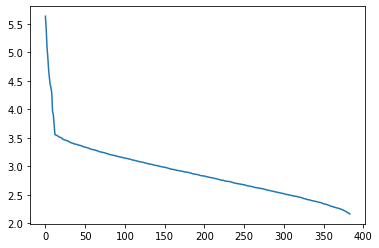

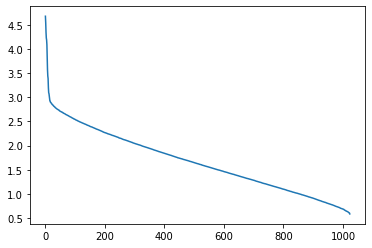

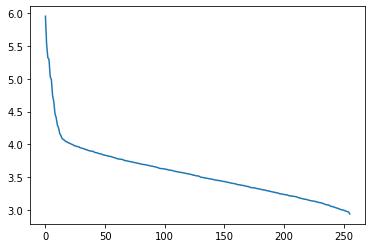

In [13]:
import matplotlib.pyplot as plt
for elem in s_values:
    plt.plot(elem)
    plt.show()

## Get colbert weights

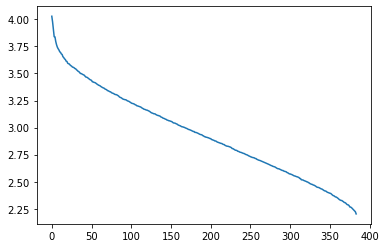

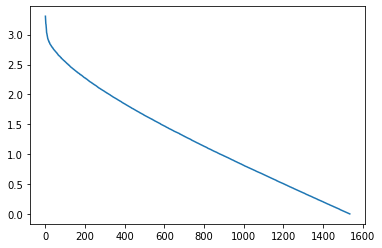

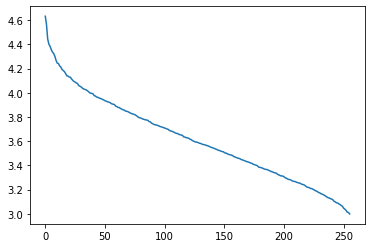

In [12]:
import matplotlib.pyplot as plt
for elem in a.weight.s_values:
    plt.plot(elem)
    plt.show()

# encoder

In [6]:
a = TTLinear(in_features = 768, out_features = 3072, ranks =[72, 72, 72] , input_dims = [12, 2, 2 ,16], output_dims= [32, 2, 3, 16])

in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


In [17]:
fc_w = colbert.bert.encoder.layer[1].intermediate.dense

In [ ]:
a.set_weight(fc_w.weight)

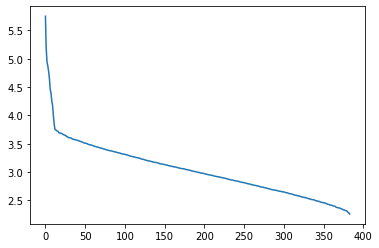

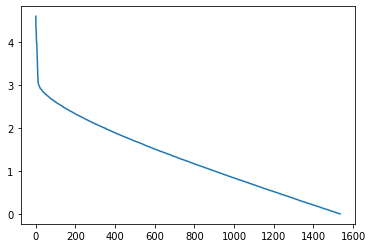

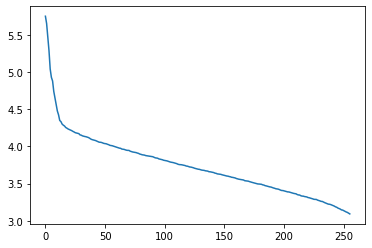

In [19]:
import matplotlib.pyplot as plt
for elem in a.weight.s_values:
    plt.plot(elem)
    plt.show()

In [3]:
a = TTLinear(in_features = 768, out_features = 3072, ranks =[72, 72, 72] , input_dims = [6, 4, 4 ,8], output_dims= [16, 4, 6, 8])

in ful rank tt data.shape torch.Size([96, 16, 24, 64])
self.cores shape [torch.Size([1, 96, 96]), torch.Size([96, 16, 1536]), torch.Size([1536, 24, 64]), torch.Size([64, 64, 1])]
in round tt cores
torch.Size([1, 96, 96])
torch.Size([96, 16, 1536])
torch.Size([1536, 24, 64])
torch.Size([64, 64, 1])


In [6]:
fc_w = colbert.bert.encoder.layer[0].intermediate.dense

In [ ]:
a.set_weight(fc_w.weight)

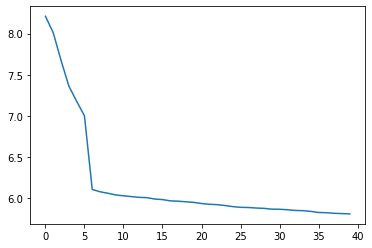

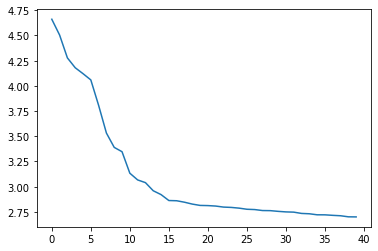

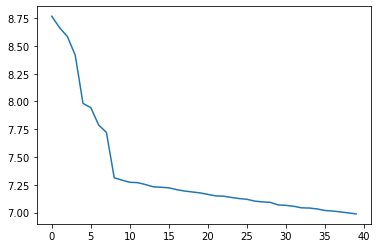

In [25]:
import matplotlib.pyplot as plt
for elem in a.weight.s_values:
    plt.plot(elem[:40])
    plt.show()

core shape1 (1, 384, 72)
core shape1 (72, 6, 72)
core shape1 (72, 4, 72)
core shape1 (72, 256, 1)
layer  0
rank, shape (1, 72, 72, 72, 1) ((12, 2, 2, 16), (32, 3, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


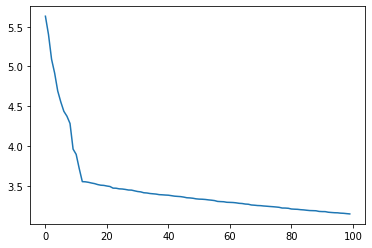

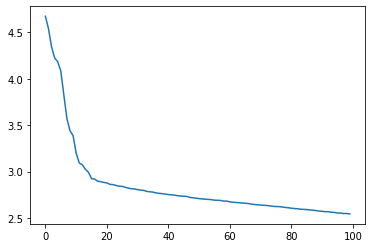

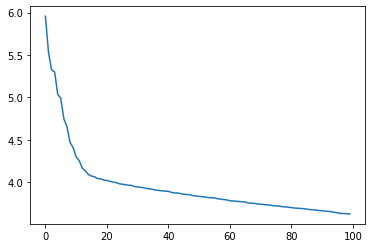



layer  1
rank, shape (1, 72, 72, 72, 1) ((12, 2, 2, 16), (32, 3, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


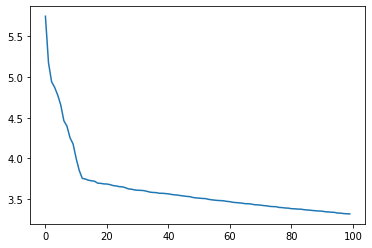

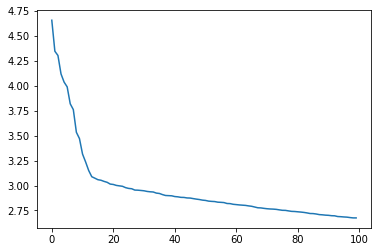

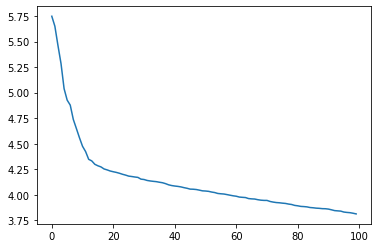



layer  2
rank, shape (1, 72, 72, 72, 1) ((12, 2, 2, 16), (32, 3, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


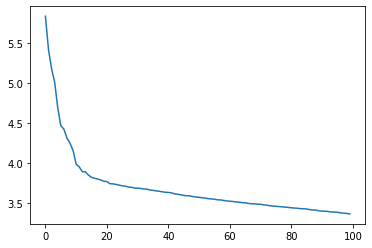

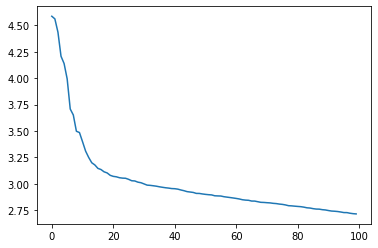

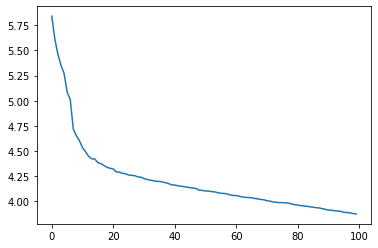



layer  3
rank, shape (1, 72, 72, 72, 1) ((12, 2, 2, 16), (32, 3, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


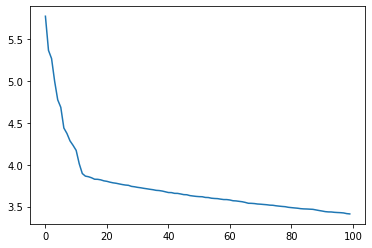

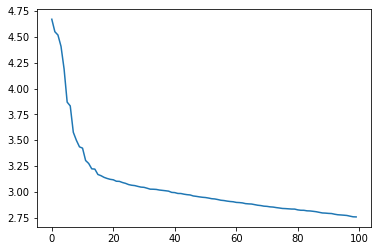

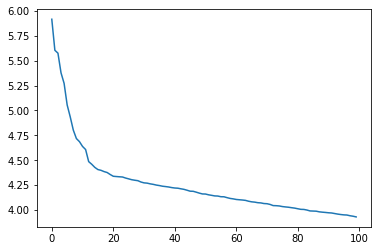



layer  4
rank, shape (1, 72, 72, 72, 1) ((12, 2, 2, 16), (32, 3, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


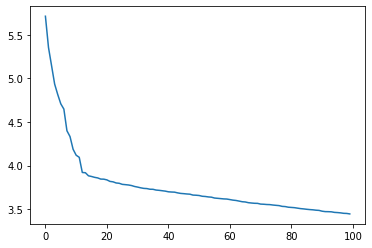

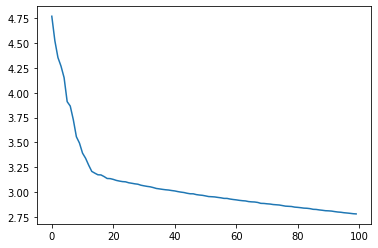

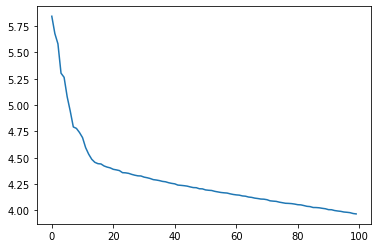



layer  5
rank, shape (1, 72, 72, 72, 1) ((12, 2, 2, 16), (32, 3, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


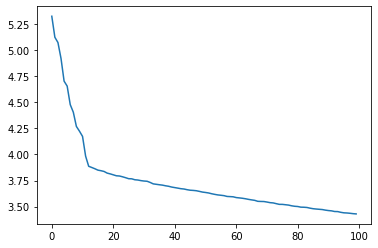

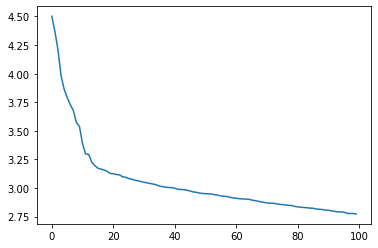

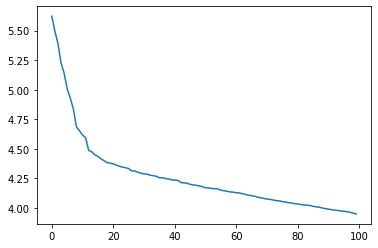



layer  6
rank, shape (1, 72, 72, 72, 1) ((12, 2, 2, 16), (32, 3, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


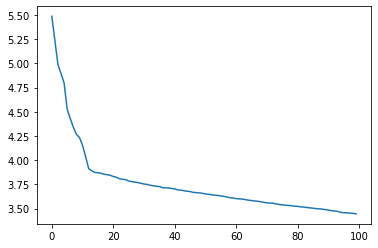

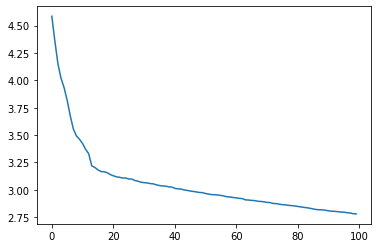

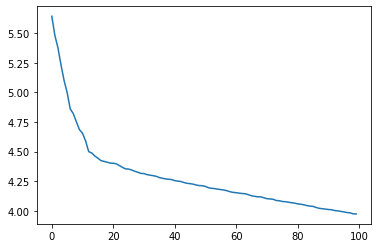



layer  7
rank, shape (1, 72, 72, 72, 1) ((12, 2, 2, 16), (32, 3, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


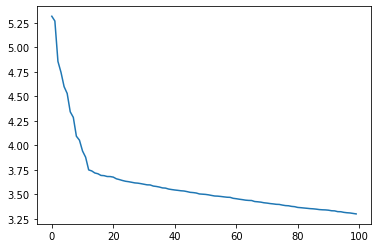

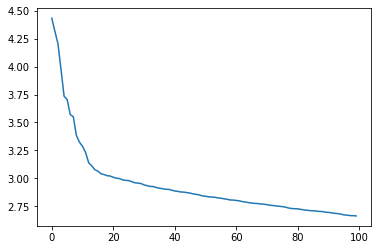

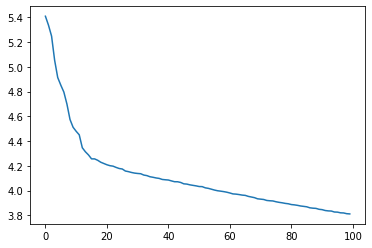



layer  8
rank, shape (1, 72, 72, 72, 1) ((12, 2, 2, 16), (32, 3, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


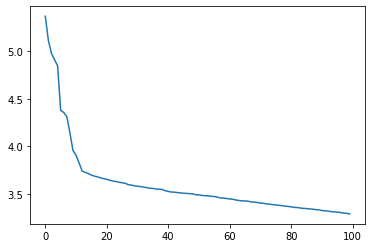

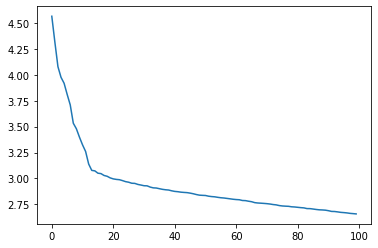

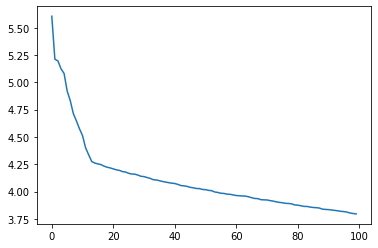



layer  9
rank, shape (1, 72, 72, 72, 1) ((12, 2, 2, 16), (32, 3, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


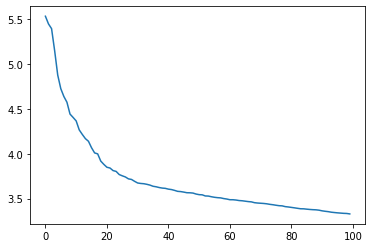

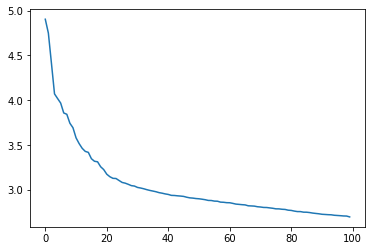

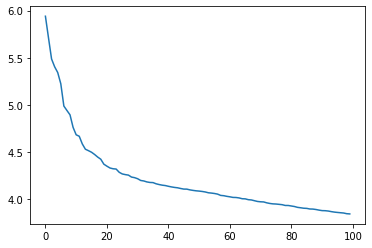



layer  10
rank, shape (1, 72, 72, 72, 1) ((12, 2, 2, 16), (32, 3, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


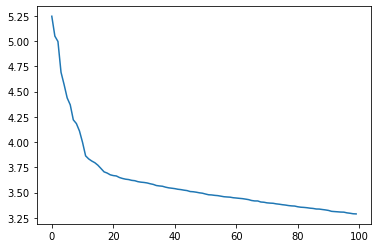

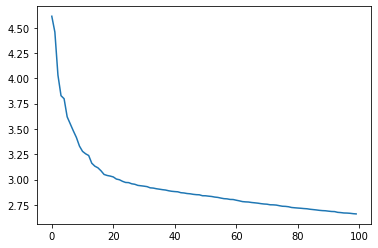

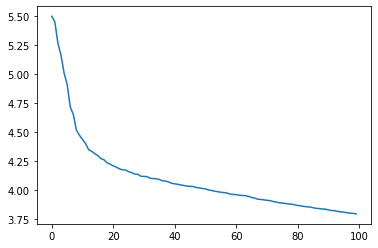



layer  11
rank, shape (1, 72, 72, 72, 1) ((12, 2, 2, 16), (32, 3, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


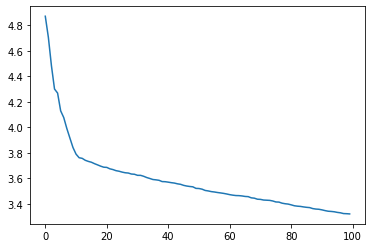

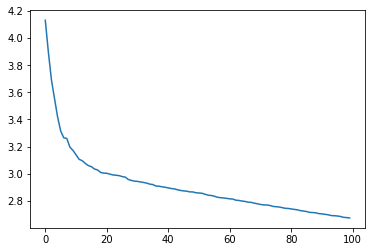

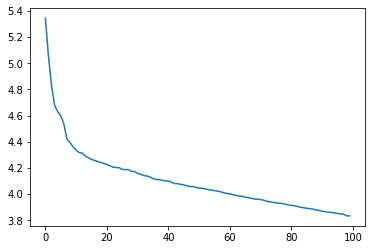

In [19]:
import matplotlib.pyplot as plt
rank = 72  # Uniform TT-rank.
shape = (
(12, 2, 2, 16),  # Row dimention.
(32, 3, 2, 16),  # Column dimention.
)

layer = TTCompressedLinear.from_linear(fc_w, shape=shape, rank=rank)


for ind, elem in enumerate(colbert.bert.encoder.layer):
    print ("layer ", ind)
    fc_w = colbert.bert.encoder.layer[ind].intermediate.dense
    s_values=layer.get_proper_rank(matrix=fc_w.weight.data.T) 
    for elem in s_values:
        plt.plot(elem[:100])
        plt.show()
    print ("\n")

## decoder

core shape1 (1, 384, 72)
core shape1 (72, 6, 72)
core shape1 (72, 4, 72)
core shape1 (72, 256, 1)
layer  0
rank, shape (1, 72, 72, 72, 1) ((32, 3, 2, 16), (12, 2, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


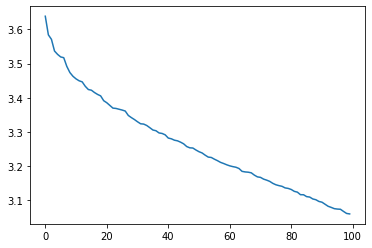

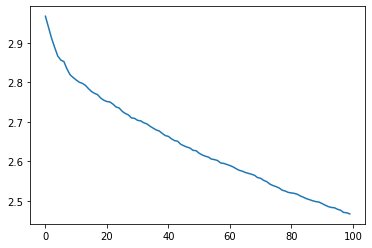

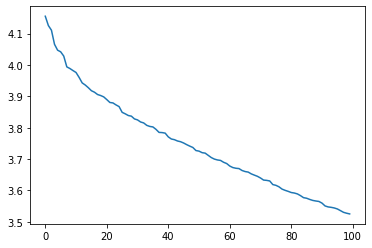



layer  1
rank, shape (1, 72, 72, 72, 1) ((32, 3, 2, 16), (12, 2, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


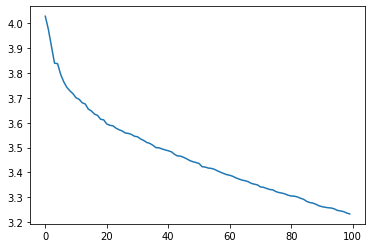

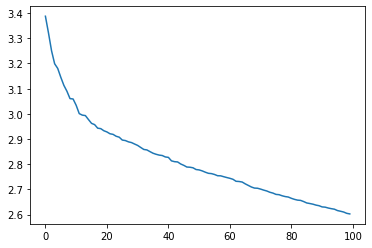

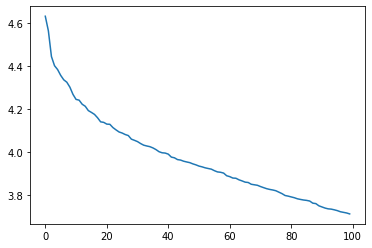



layer  2
rank, shape (1, 72, 72, 72, 1) ((32, 3, 2, 16), (12, 2, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


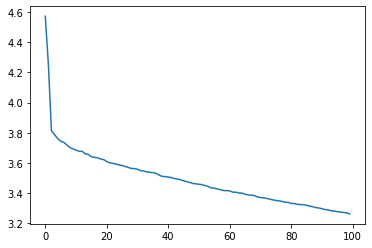

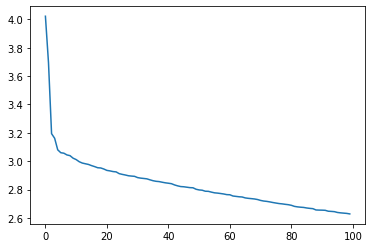

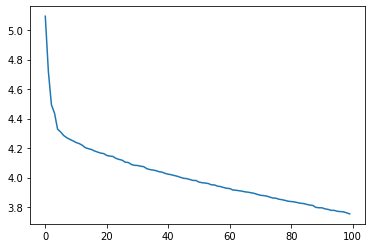



layer  3
rank, shape (1, 72, 72, 72, 1) ((32, 3, 2, 16), (12, 2, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


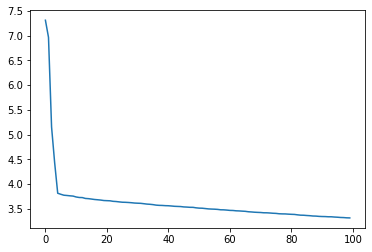

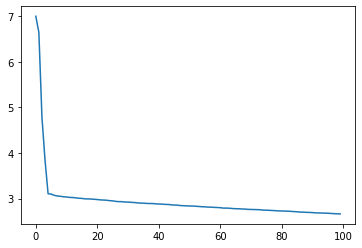

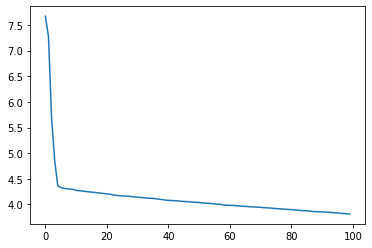



layer  4
rank, shape (1, 72, 72, 72, 1) ((32, 3, 2, 16), (12, 2, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


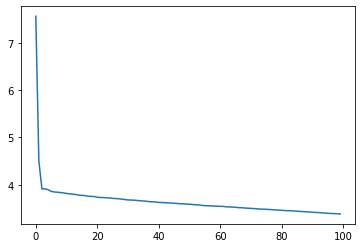

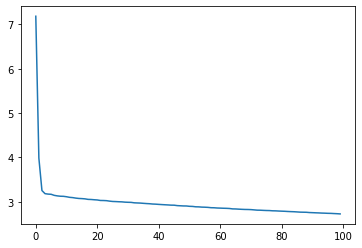

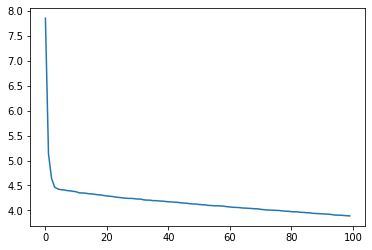



layer  5
rank, shape (1, 72, 72, 72, 1) ((32, 3, 2, 16), (12, 2, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


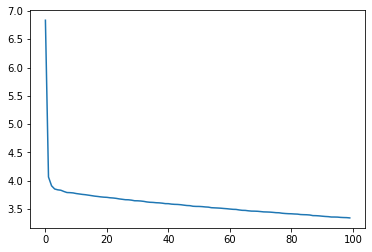

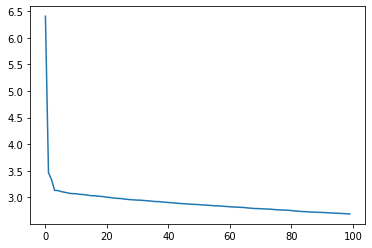

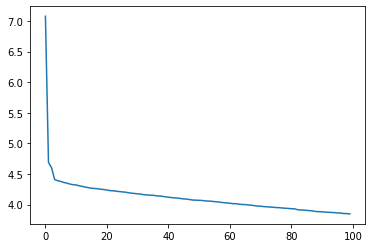



layer  6
rank, shape (1, 72, 72, 72, 1) ((32, 3, 2, 16), (12, 2, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


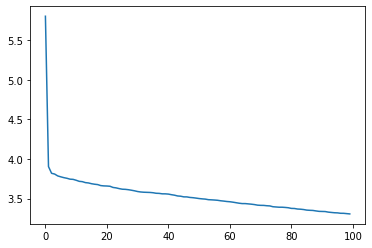

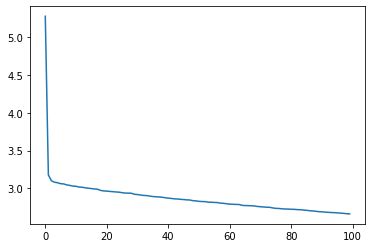

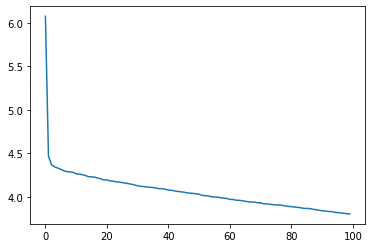



layer  7
rank, shape (1, 72, 72, 72, 1) ((32, 3, 2, 16), (12, 2, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


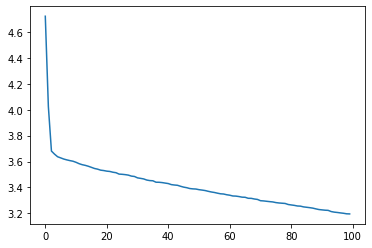

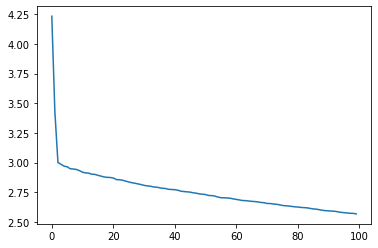

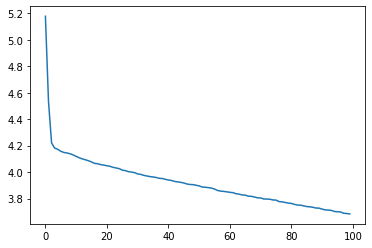



layer  8
rank, shape (1, 72, 72, 72, 1) ((32, 3, 2, 16), (12, 2, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


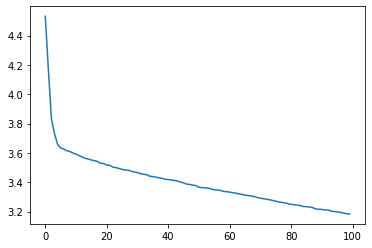

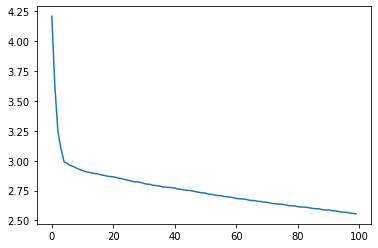

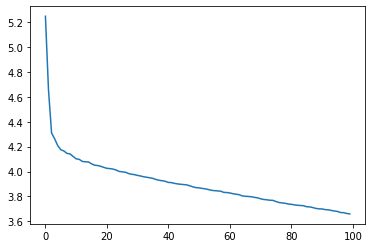



layer  9
rank, shape (1, 72, 72, 72, 1) ((32, 3, 2, 16), (12, 2, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


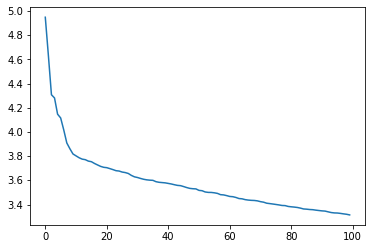

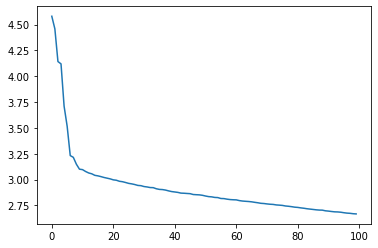

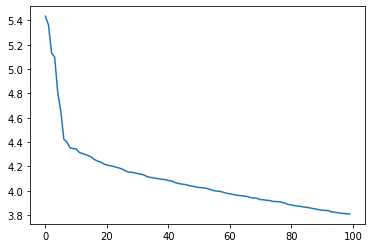



layer  10
rank, shape (1, 72, 72, 72, 1) ((32, 3, 2, 16), (12, 2, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


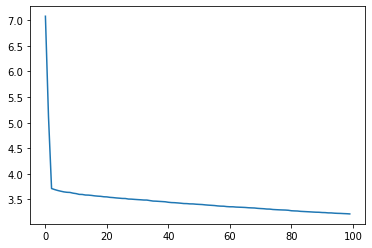

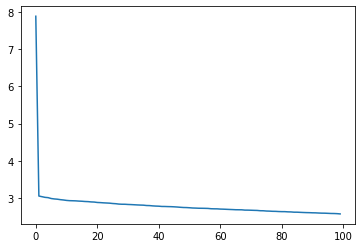

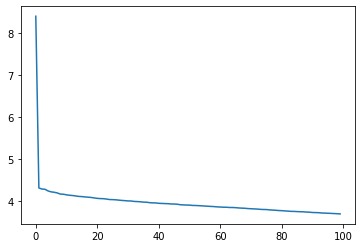



layer  11
rank, shape (1, 72, 72, 72, 1) ((32, 3, 2, 16), (12, 2, 2, 16))
tt_rank, tt_shape (1, (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), (1, 72, 72, 72, 1), 1) (384, 6, 4, 256)
ten shape before torch.Size([384, 6, 4, 256])
first, second 384 6144
shapes before [384, 6, 4, 256]
shapes after torch.Size([384, 6144])
first, second 2304 1024
shapes before [384, 6, 4, 256]
shapes after torch.Size([2304, 1024])
first, second 9216 256
shapes before [384, 6, 4, 256]
shapes after torch.Size([9216, 256])


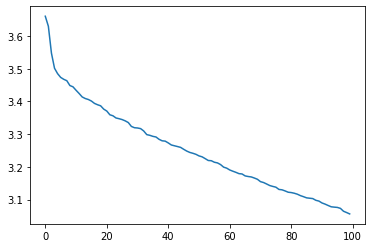

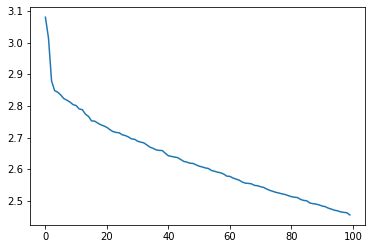

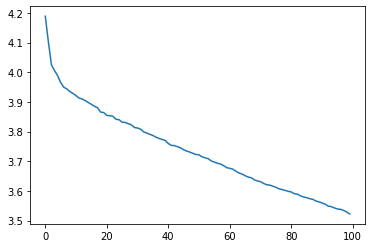

In [23]:
import matplotlib.pyplot as plt
rank = 72  # Uniform TT-rank.
shape = (
(32, 3, 2, 16),   # Row dimention.
(12, 2, 2, 16), # Column dimention.
)

layer = TTCompressedLinear.from_linear(fc_w, shape=shape, rank=rank)

for ind, elem in enumerate(colbert.bert.encoder.layer):
    print ("layer ", ind)
    fc_w = colbert.bert.encoder.layer[ind].output.dense
    s_values=layer.get_proper_rank(matrix=fc_w.weight.data.T) 
    for elem in s_values:
        plt.plot(elem[:100])
        plt.show()
    print ("\n")